<a href="https://colab.research.google.com/github/Joannana/python-practice/blob/master/Amazon_Prime_Video_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Amazon Prime Video


---


There are about 4000+ rows and 16 columns. Cvt_per_day is a measure on how much a movie is consumed by the audiences per day. Higher number means the movie is more popular on our platform.
The following are the descriptions of the columns:
Video_id	:	A unique id for a movie

Cvt_per_day	:	Cumulated view time per day

weighted_categorical_position	:	Average vertical positions on the home page that the movie was placed

weighted_horizontal_poition	:	Average horizontal positions on the home page that the movie was placed

genres	:	genres of the movie

release_year	:	the year the movie was released

imdb_votes	:	the number of votes on IMDB, typically higher the votes the better

budget	:	budget of the movie production, typically the higher the better

boxoffice	:	gross box office in US as updated on IMDB, typically the higher the better

imdb_rating	:	ratings on IMDB

duration_in_mins	:	How long is the content in minutes

mpaa	:	MPAA ratings

awards	:	TVPG ratings

Import_id	:	Content partners

Metacritic Score	:	Metacritic score on IMDB page. Typically, the higher the better

Star_cateogry	:	A score to measure how popular the actor/actress are associated with the movie

Questions:
A.	Build a prediction model to predict whether a movie is going to perform well on our platform (cvt_per_day) based on the information in the dataset.
1.	What are the important features?
2.	How do you weigh in the position bias – When a movie is placed at the first position, it naturally has higher cvt because more viewers will click on it 
B.	We are curious to hear about (1) how you dealt with missing values, (2) how you selected, transformed, or engineered new features, (3) the type of model used, and why, and (4) any particular insights or other thoughts you have on this dataset.
Instructions:
A.	Please attach both your write-up and your code in one document that is easy to understand.
B.	Including visualization in your write-up is highly recommended.
C.	You are free to use whatever tools you are most comfortable with to work through the analysis.

You might want to start your investigation of missing data by finding out whether you have informative or non-informative missings. The first category is produced by random data loss; in this case, the observations with missing values are no different from the ones with complete data. As for informative missing data, this one tells you something about your observation. A simple example is a customer record with a missing contract cancellation date meaning that this customer's contract has not been cancelled so far. You usually don't want to fill in informative missings with a mean or a median, but you may want to generate a separate feature from them.



###1. Data Preparation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

###1.1. Load Data

####1.1.1. Load Data from Google Drive

In [0]:
# Read data from Google Drive (recommend)
# step 1: change your csv file in Drive as Anyone with the link can view

# https://drive.google.com/open?id=11HugdL45YN_iJt-hpdBm3OByetAvlIk-

file_id='11HugdL45YN_iJt-hpdBm3OByetAvlIk-'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
data = pd.read_csv(csv_url)


In [0]:
data.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [0]:
data.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


####1.1.2. Load Data from URL

In [0]:
# read data from URL

'''
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(iris, sep=',', header=None)
print(df_iris.head())

'''


"\niris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'\ndf_iris = pd.read_csv(iris, sep=',', header=None)\nprint(df_iris.head())\n\n"

####1.1.3. Load Data from Github Link

In [0]:
'''

import pandas as pd
import io
import requests
url="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"
c=pd.read_csv(url)

'''

'\n\nimport pandas as pd\nimport io\nimport requests\nurl="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"\nc=pd.read_csv(url)\n\n'

####1.1.4 Load Data from Local File

In [0]:
'''
import pandas as pd
# read data from csv file
# pd.read_csv("../data_folder/data.csv")

'''

'\nimport pandas as pd\n# read data from csv file\n# pd.read_csv("../data_folder/data.csv")\n\n'

###1.2. Data Exploration

####1.2.1. Check Missing Information

In [0]:
data.shape # size of dataset

(4226, 16)

In [0]:
data.info()  #the overview information for the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

The data.info() results reveal that there is no missing cell in this dataset.

In [0]:
data.isnull().sum() # The number of rows with NaN for each column

video_id                         0
cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64

In [0]:
data.describe(percentiles = [0.1,0.25,0.5,0.75,0.9])

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,280371.162565,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,112640.127822,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,7909.000000,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,30848.000000,141.984913,3.000000,13.000000,1974.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.390781,0.000000,0.000000
25%,285104.250000,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,313891.500000,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,349345.750000,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
90%,376150.500000,7930.121453,15.000000,44.000000,2014.000000,12180.500000,5.000000e+06,8.551228e+06,7.500000,111.033917,57.000000,2.250000
max,394880.000000,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


From the data.describe() percentile information, we could find that there is severe missing information in the dataset, here is a brief summary for the missing information:

budget ~50%

boxoffice ~75%

metacritic_score ~50%

star_category ~25%

In [0]:
print((data == 0).sum())  # Find the total zeros in each column

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64


The missing values have been detected by data.descibe() and print((data ==0).sum())

####1.2.1. Exclude Erroneous Data
Each video should only appear once in the list, duplicated video will be removed.

In [0]:
# check whether or not the dataset includes duplicated rows
len(data.set_index('video_id').index.get_duplicates())==0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.


True

There is no duplicated data entry based on the video_id

In [0]:
pd.set_option('display.float_format',lambda x:'%.0f' % x)
data.describe()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226,4226,4226,4226,4226,4226,4226,4226,4226,4226,4226,4226
mean,280371,4219,8,28,2001,6463,2150743,2536338,5,90,16,1
std,112640,13036,6,12,17,31596,7176604,8243516,2,21,26,1
min,7909,2,1,1,1916,0,0,0,0,4,0,0
25%,285104,351,4,20,1998,81,0,0,4,83,0,0
50%,313892,1193,6,28,2008,535,0,0,6,91,0,1
75%,349346,3357,9,36,2012,3053,1500000,0,7,100,41,2
max,394880,307128,41,70,2017,948630,107000000,184208848,10,246,100,4


####1.2.2. cvt_per_day feature

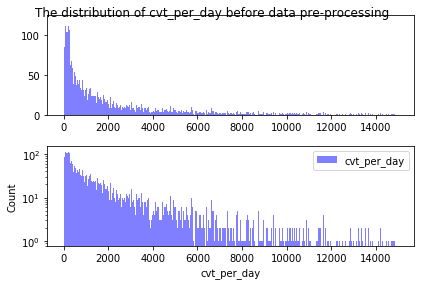

In [0]:
# cvt_per_day data explore
fig,(ax1,ax2) = plt.subplots(2,1)
fig.suptitle('The distribution of cvt_per_day before data pre-processing')
ax1.hist(data['cvt_per_day'].values, bins = range(0,15000,30),alpha=0.5,color = 'blue',label = 'cvt_per_day')
ax2.hist(data['cvt_per_day'].values, log = True, bins = range(0,15000,30),alpha=0.5,color = 'blue',label = 'cvt_per_day')
plt.legend(loc ='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('Count')
plt.tight_layout()


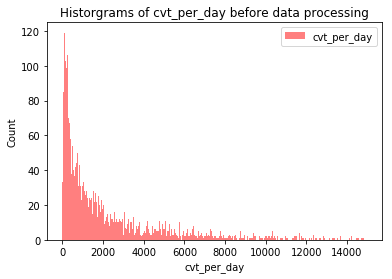

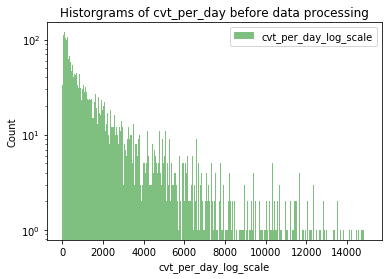

In [0]:
# cvt_per_day data explore
plt.hist(data['cvt_per_day'].values, bins = range(0,15000, 30), alpha = 0.5, color='r', label = 'cvt_per_day')
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('Count')
plt.show()

# log scale of y due to large variation
plt.hist(data['cvt_per_day'].values, log = True, bins = range(0,15000, 30), alpha = 0.5, color='g', label = 'cvt_per_day_log_scale')
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('Count')
plt.show()


####1.2.3. Correlation among numerical features

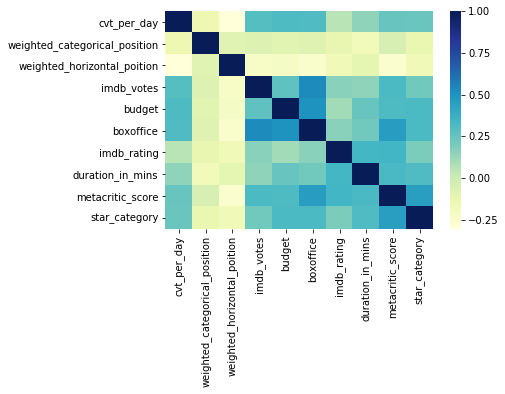

In [0]:
# correlation of the numerical features
numerical_feature = data.drop(['video_id','release_year'],axis = 1)  # no need to drop other categorical data because the corr will not take categorical data into computation
corr = numerical_feature.corr()
sns.heatmap(corr,cmap="YlGnBu")

The results reveal that the imdb_votes, budget, boxoffice, metacritic_score, and star_category are highly correlated to cvt_per_day

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
imdb_votes,0.298,-0.064,-0.221,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,0.322,0.315,0.465,0.347,0.327,1.000,0.452
star_category,0.247,-0.123,-0.168,0.225,0.322,0.322,0.192,0.309,0.452,1.000


###1.3. Understand the categorical features

####1.3.1. Simple categorical feature(mpaa, import_id,awards)

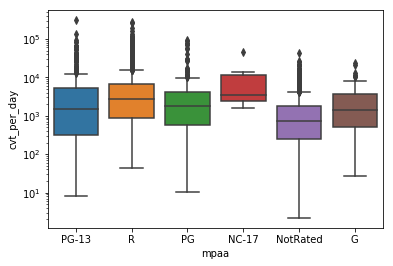

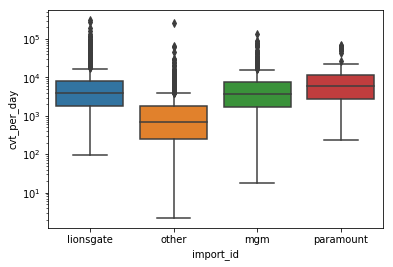

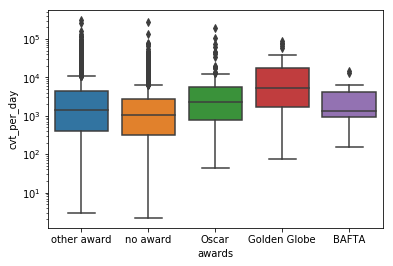

In [0]:
# Boxplots
sns.boxplot(x = 'mpaa', y = 'cvt_per_day', data=data).set_yscale('log')
plt.show()
sns.boxplot(x = 'import_id', y = 'cvt_per_day', data=data).set_yscale('log')
plt.show()
sns.boxplot(x = 'awards', y = 'cvt_per_day', data=data).set_yscale('log')
plt.show()

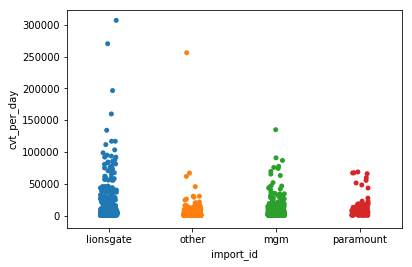

       index  import_id
0      other       2963
1  lionsgate        677
2        mgm        445
3  paramount        141


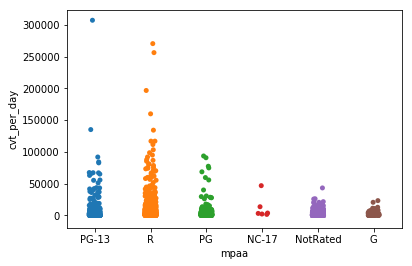

      index  mpaa
0  NotRated  2158
1         R  1158
2     PG-13   426
3        PG   353
4         G   125
5     NC-17     6


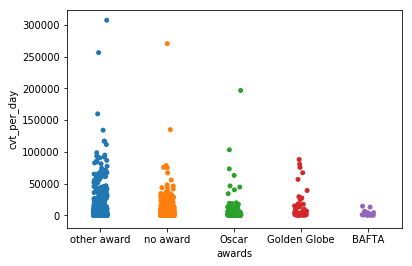

          index  awards
0      no award    2569
1   other award    1453
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [0]:
# Stripplot
sns.stripplot(x='import_id', y='cvt_per_day', data=data, jitter=True)
plt.show()
print (data['import_id'].value_counts().reset_index())

sns.stripplot(x='mpaa', y='cvt_per_day', data=data, jitter=True)
plt.show()
print (data['mpaa'].value_counts().reset_index())

sns.stripplot(x='awards', y='cvt_per_day', data=data, jitter=True)
plt.show()
print (data['awards'].value_counts().reset_index())

####1.3.2. Distribution of splited genres
Some videos belong to more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.

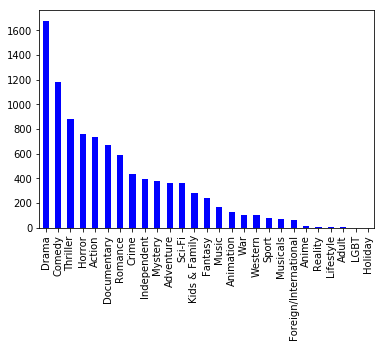

In [0]:
# generes explore, split the genre of each video
gen_split = data['genres'].str.get_dummies(sep=',').sum()
gen_split.sort_values(ascending = False).plot.bar(color = 'blue')

6 genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have low frequencies. Therefore, during feature processing, they will be grouped together as"Misc_gen" in the feature 'genres'.

####1.3.3. Distribution of release_year
The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

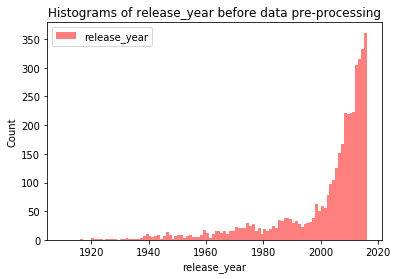

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [0]:
plt.figure(1)
plt.hist(data['release_year'].values, bins = range(1910,2017,1), alpha = 0.5, color = 'r', label = 'release_year')
plt.legend(loc = 'upper left')
plt.title('Histograms of release_year before data pre-processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

print (data['release_year'].describe(percentiles = [.1, .2, .3, .4,.5, .6, .7, .8, .9]))

###2. Feature Pre-processing

####2.1. Categorical features
There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [0]:
# Select all categorical data
categorical = data[['import_id','mpaa','awards','genres','release_year']]
categorical.head()

# Convert the first 3 variables to dummies due to the small sub-types
categorical_dummies = pd.get_dummies(categorical.iloc[ :,0:3]).astype(int)
categorical_dummies.head()

# Convert 'genres' into dummy variables
d_genres = pd.DataFrame() 
for genre in ['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama'
          , 'Fantasy', 'Foreign/International', 'Holiday', 'Horror', 'Independent', 'Kids & Family', 'LGBT', 
          'Lifestyle', 'Music', 'Musicals','Mystery', 'Reality', 'Romance','Sci-Fi', 'Sport', 'Thriller', 'War', 
          'Western']:
    gen_lst = []
    for i in range(4226):        
        if genre in data['genres'][i]:
            gen_lst.append(1)    
        else: 
            gen_lst.append(0)  
    d_genres[genre] = pd.Series(gen_lst).values
    
# combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.
d_genres['Misc_gen'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

# Another way for genre dummies, we use the splitted genre
genre_split = data['genres'].str.get_dummies(sep=',')

# combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.
genre_split['Misc_gen'] = genre_split['Anime']|genre_split['Reality']|genre_split['Lifestyle']|genre_split['Adult']|genre_split['LGBT']|genre_split['Holiday']
genre_split.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

# Dummy variables for release_year
data['release_year'].describe()  # we could know that the release_year is ranging from 1916 to 2017
# Cut the release_year into 10 bins based on the percentiles calculated in 1.3.3
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014,2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(data['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(int)



In [0]:
# Get new dataframe with dummy variables by categorical features
data_temp = data.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newData = pd.concat([data_temp,categorical_dummies,genre_split,d_year],axis = 1)
print (newData.shape)
print (pd.isnull(newData).any(1).nonzero()[0])
print (newData.head())
newData_0 = newData.copy() # a copy of newTV

(4226, 58)
[]
   video_id  cvt_per_day  ...  2013-2014  2014-2017
0    385504   307127.606  ...          0          0
1    300175   270338.426  ...          0          0
2    361899   256165.867  ...          0          0
3    308314   196622.721  ...          0          0
4    307201   159841.652  ...          0          0

[5 rows x 58 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


####2.2. Handling of missing data
Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

In [0]:
# mark zero values as NaN
newData[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newData[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

# count the number of NaN values in each column
print (newData.isnull().sum())

#count the number videos who have at least one missing data 
print ('videos having at least one null: ', newData.isnull().any(axis=1).sum())

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
import_id_lionsgate                 0
import_id_mgm                       0
import_id_other                     0
import_id_paramount                 0
mpaa_G                              0
mpaa_NC-17                          0
mpaa_NotRated                       0
mpaa_PG                             0
mpaa_PG-13                          0
mpaa_R                              0
awards_BAFTA                        0
awards_Golden Globe                 0
awards_Oscar                        0
awards_no award                     0
awards_other award                  0
Action      

####2.2.1. Filling missing data with mean value
For imdb_votes and imdb_rating, they always show 'null' together, which is reasonable, since when a imdb_votes is missing, the imdb_rating is mostly also missing. For all 6 features with missing data, the 1st attempt is to fill in with their mean value.

In [0]:
# fill missing values with the column mean
newData_i1 = newData.copy()
newData_i1['budget'].fillna(newData_i1['budget'].mean(), inplace=True)
newData_i1['boxoffice'].fillna(newData_i1['boxoffice'].mean(), inplace=True)
newData_i1['metacritic_score'].fillna(newData_i1['metacritic_score'].mean(), inplace=True)
newData_i1['star_category'].fillna(newData_i1['star_category'].mean(), inplace=True)
newData_i1['imdb_votes'].fillna(newData_i1['imdb_votes'].mean(), inplace=True)
newData_i1['imdb_rating'].fillna(newData_i1['imdb_rating'].mean(), inplace=True)

newData_i1 have the feature processing as: fill the missing data in budget, boxoffice, metacritic_score, star_category, imdb_votes, imdb_rating with mean. It will be tested in the upcoming models.

####2.3. Feature scaling
The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used.

In [0]:
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newData_sc = newData_i1.copy()

sc_scale = preprocessing.StandardScaler().fit(newData_sc[scale_lst])  # use sklearn.preprocessing package
newData_sc[scale_lst] = sc_scale.transform(newData_sc[scale_lst])

newData_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_gen,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,0.033,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,3.434,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,2.102,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.063,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,3.029,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
# MinMax scaling
newData_mm = newData_i1.copy()
mm_scale = preprocessing.MinMaxScaler().fit(newData_mm[scale_lst])  # from sklearn preprocessing package
newData_mm[scale_lst] = mm_scale.transform(newData_mm[scale_lst])

In [0]:
# Robust scaling
newData_rs = newData_i1.copy()
rs_scale = preprocessing.RobustScaler().fit(newData_mm[scale_lst])
newData_rs[scale_lst] = rs_scale.transform(newData_rs[scale_lst])

###3. Model Training
85% of the samples will be used to train all the models, and 15% is reserved for test the models in next section.

In [0]:
# The 15% test data will kept aside, they won't be seen by the models until final test/comparison.

model_train, model_test = train_test_split(newData_sc, test_size=0.15, random_state = 3)  ## from sklearn.model_selection import train_test_split
model_train_x = model_train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = model_test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = model_train['cvt_per_day']
model_test_y = model_test['cvt_per_day']

###3.1. Linear models

####3.1.1. Lasso linear regression
1) All features are linear: LASSO

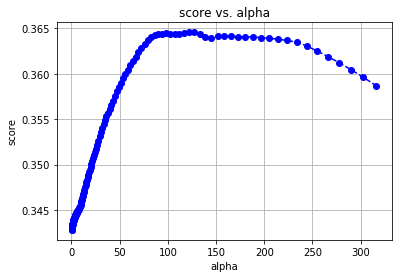

The optimaized alpha and score of Lasso linear is:  122.06107238906554 0.36457853302954246


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)   ## the random_state is like the seed in R
lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=150)  # alphas ranges from 10^(-0.3) to 10^2.5, which is from 0.5 to 316
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')            ## the float(inf) or float(-inf) need to be specified in a comparison for loop, e.g. greatest, smallest
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)    #Returns the coefficient of determination R^2 of the prediction.
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

In [0]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

# lasso_f is the Lasso model (linear feature), to be tested with final test data.

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

2) Polynomial features

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32955562904.809734, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32961858347.0376, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32969156642.67377, tolerance: 48022560.445868425
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32977598087.1

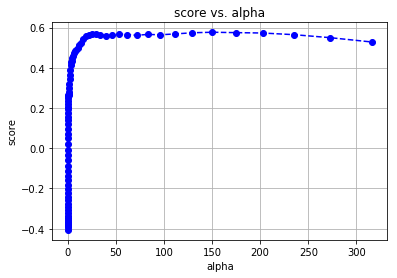

The optimaized alpha and score of Lasso polynomial is:  150.38869469554086 0.5764936326091713


Lasso(alpha=150.38869469554086, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

# lr_train_xp = pd.DataFrame(data=lr_train_xp, index=data[:], columns=data[0,1:]) 

alphas = np.logspace (-2.6, 2.5, num=80)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

lasso_fp = Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, model_train_y)

# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

####3.1.2. Ridge linear regression

1) All features are linear

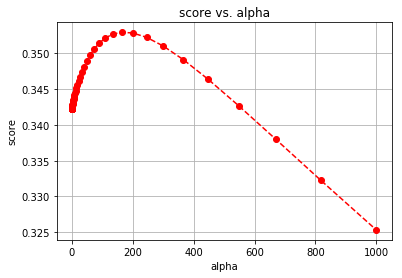

0.35296043098491625 163.97026580002054


In [0]:
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

alphas = np.logspace (-10, 3, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print (max_score, opt_a)


In [0]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

2) Polynomial features

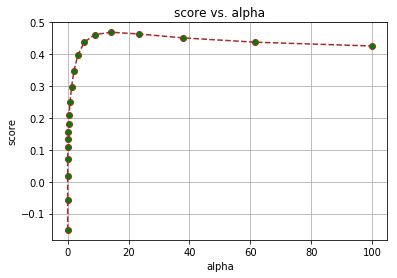

0.468169187001961 14.38449888287663


In [0]:
# Use the same training data set as Lasso (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print (max_score, opt_a)


In [0]:
# add the 15% validate data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

ridge_fp = Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp1, model_train_y)

# ridge_fp is the Ridge model (polynomial feature), to be tested with test data.

Ridge(alpha=14.38449888287663, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

####3.2. Non-linear model
Random forest with Gridsearch cross-validation is used. The 'mean_scores' is used to narrow down the paramenters of n_estimator (number of trees in the forest) and Max_depth (maximum depth of the tree).

In [0]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

rf_train, rf_test = train_test_split(model_train, test_size=0.15, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

param_grid = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }  ###n_estimators : integer, optional (default=10), The number of trees in the forest.

## max_depth : integer or None, optional (default=None) The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, cv=5)   # cv is the cross-validation splitting strategy, e.g. three-fold, cv = 3
grid_rf.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [12, 13, 14, 15, 16, 

In [0]:
grid_rf.best_params_ 

{'max_depth': 14, 'n_estimators': 55}

In [0]:
grid_rf.cv_results_

{'mean_fit_time': array([0.15495429, 0.15058961, 0.15895233, 0.16037588, 0.16082082,
        0.16392331, 0.16498213, 0.17133856, 0.15906601, 0.16013327,
        0.16613593, 0.173628  , 0.17282677, 0.17484894, 0.18144093,
        0.18456073, 0.16805129, 0.17286091, 0.17826972, 0.18364925,
        0.18490472, 0.18693628, 0.1889039 , 0.19499226, 0.18431659,
        0.18521361, 0.18638649, 0.19164524, 0.19620605, 0.1980751 ,
        0.20145559, 0.21037545, 0.19271178, 0.1949369 , 0.2021894 ,
        0.20026336, 0.20522399, 0.21248021, 0.21457887, 0.21663308,
        0.19721308, 0.20059805, 0.20689569, 0.21168728, 0.21310539,
        0.22444429, 0.22317538, 0.22667017]),
 'mean_score_time': array([0.00865655, 0.0087183 , 0.00906892, 0.00904999, 0.0091197 ,
        0.00933614, 0.00930572, 0.00951462, 0.0088573 , 0.00862174,
        0.00957012, 0.00952945, 0.0099247 , 0.00940371, 0.00984778,
        0.01012449, 0.00915389, 0.009727  , 0.01040211, 0.01104507,
        0.01053085, 0.01067066, 0.

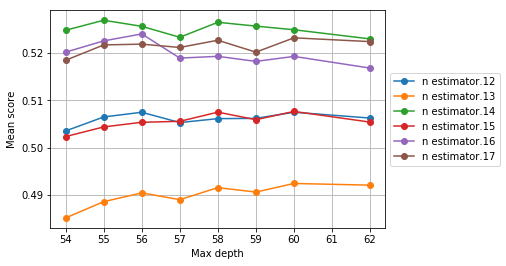

In [0]:
# plot the effect of different number of trees and maximum tree-depth during cross validation 
scores = grid_rf.cv_results_['mean_test_score']

n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))   ##change 'scores' to array, then change to a matrix
fig = plt.figure()
ax = plt.subplot(111)
for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='n estimator.' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Max depth')
plt.ylabel('Mean score')
plt.grid(True)
plt.show()
# savefig('rf_1')

In [0]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(model_train_x, model_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=55,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

From GridSearchCV cross validation results, the best rf model is n_estimator = 14, and max_depth = 55

###4. Model Evaluation
Test data is the reserved 15% of the whole dataset, and has never been seen by the above models

####4.1. Lasso test with linear features (lasso_f)

In [0]:
# Lasso_f test (with linear features)

lasso_f_score = lasso_f.score(model_test_x, model_test_y)  #Returns the mean accuracy on the given test data and labels.
pred_y = lasso_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_lasso_f = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_f score: ', lasso_f_score)
print ('Mean square error of lasso_f: ', MSE_lasso_f)
print ('Root mean squared error of lasso_f:', RMSE_lasso_f)
# print ('Coefficients of lasso_f: ', lasso_f.coef_)

lasso_f score:  0.09954927178753703
Mean square error of lasso_f:  238953191.99910036
Root mean squared error of lasso_f: 15458.110880670392


####4.2. Lasso test with polynomial features (lasso_fp)

In [0]:
# Lasso_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)
pred_y = lasso_fp.predict(model_test_xp)

lasso_fp_score = lasso_fp.score(model_test_xp, model_test_y)
MSE_lasso_fp = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_fp score: ', lasso_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lasso_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lasso_fp)
# print ('Coefficients of lasso_fp: ', lasso_fp.coef_)

lasso_fp score:  -0.08392274794825738
Mean square error of lasso_fp:  287641280.5138621
Root mean squared error of lasso_fp: 16959.990581184356


####4.3. Ridge test with linear features (ridge_f)

In [0]:
# ridge_f test (with linear features)

ridge_f_score = ridge_f.score(model_test_x, model_test_y)
pred_y = ridge_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_ridge_f = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('ridge_f score: ', ridge_f_score)
print ('Mean square error of ridge_f: ', MSE_ridge_f)
print ('Root mean squared error of ridge_f:', RMSE_ridge_f)
# print ('Coefficients of ridge_f: ', ridge_f.coef_)

ridge_f score:  0.11371374943726809
Mean square error of ridge_f:  235194355.4060952
Root mean squared error of ridge_f: 15336.047580980414


####4.4. Ridge test with polynomial features (ridge_fp)

In [0]:
# ridge_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)

ridge_fp_score = ridge_fp.score(model_test_xp, model_test_y)
MSE_ridge_fp = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(model_test_y, pred_y))

pred_y = ridge_fp.predict(model_test_xp)
print ('ridge_fp score: ', ridge_f_score)
print ('Mean square error of ridge_fp: ', MSE_ridge_fp)
print ('Root mean squared error of ridge_fp:', RMSE_ridge_fp)
#print ('Coefficients of ridge_fp: ', ridge_fp.coef_)

ridge_fp score:  0.11371374943726809
Mean square error of ridge_fp:  235194355.4060952
Root mean squared error of ridge_fp: 15336.047580980414


####4.5. Random forest test (rf)

In [0]:
rf_score = rf.score(model_test_x, model_test_y)

pred_y = rf.predict(model_test_x)
MSE_rf = mean_squared_error(model_test_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(model_test_y, pred_y))

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)
# print('Coefficients: \n', ridge_fp.coef_)

rf score:  0.5165772811589044
Mean square error of rf:  128286199.49175872
Root mean squared error of rf: 11326.349786747658


####4.6. Comparison of the 5 models
Compared the max_score, mean squared error (MSE), and root mean squared error (RMSE) of 5 models. Random forest model rf returns the beset prediction accuracy.

No handles with labels found to put in legend.


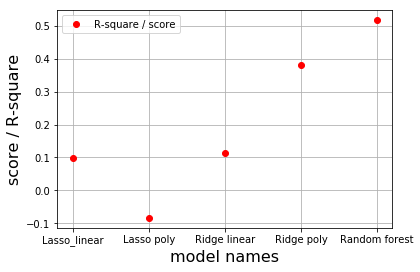

No handles with labels found to put in legend.


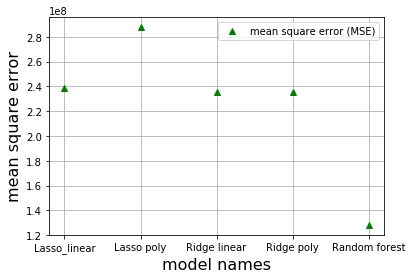

No handles with labels found to put in legend.


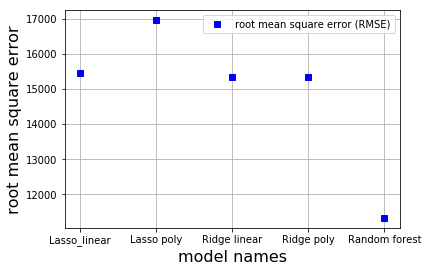

In [0]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(loc = 9)
plt.legend(['R-square / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / R-square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

###5. Feature Importance
Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model.

Feature importance ranking:
1. feature 0 weighted_categorical_position (0.151490)
2. feature 2 weighted_horizontal_poition (0.133391)
3. feature 1 imdb_votes (0.112314)
4. feature 3 budget (0.070595)
5. feature 7 boxoffice (0.060027)
6. feature 8 imdb_rating (0.051750)
7. feature 4 duration_in_mins (0.051296)
8. feature 6 metacritic_score (0.039816)
9. feature 9 star_category (0.036208)
10. feature 11 import_id_lionsgate (0.030517)
11. feature 5 import_id_mgm (0.027920)
12. feature 10 import_id_other (0.019769)
13. feature 53 import_id_paramount (0.019051)
14. feature 52 mpaa_G (0.015720)
15. feature 18 mpaa_NC-17 (0.013947)
16. feature 28 mpaa_NotRated (0.013426)
17. feature 49 mpaa_PG (0.010542)
18. feature 23 mpaa_PG-13 (0.009500)
19. feature 42 mpaa_R (0.009128)
20. feature 22 awards_BAFTA (0.007116)
21. feature 38 awards_Golden Globe (0.006958)
22. feature 30 awards_Oscar (0.006782)
23. feature 27 awards_no award (0.006641)
24. feature 50 awards_other award (0.006127)
25. feature 

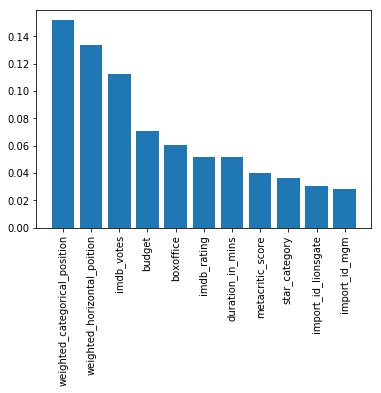

In [0]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = model_test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(model_test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()